In [2]:
# flight fare analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

# data loading
flight_data = pd.read_csv("flightdata.csv")

# data inspection for understanding the data 
flight_data.shape





(10683, 11)

In [3]:
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
flight_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
# mean > medain  :-positivily  
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
flight_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


# Data Cleaning

In [7]:
# data cleaning
# trace null values and filling it(if there are nless null values  = drop the nulls or else fill the null)

flight_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
flight_data[flight_data["Route"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
# dropping 9039th toe
flight_data=flight_data.dropna()
flight_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
flight_data.duplicated(keep = False)

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Length: 10682, dtype: bool

In [11]:
flight_data[flight_data.duplicated(keep = False)].sort_values(by = flight_data.columns.tolist())

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6321,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
9848,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
572,Air India,03/03/2019,Banglore,New Delhi,BLR → DEL,21:10,23:55,2h 45m,non-stop,No info,7591
8168,Air India,03/03/2019,Banglore,New Delhi,BLR → DEL,21:10,23:55,2h 45m,non-stop,No info,7591
1495,Air India,1/04/2019,Kolkata,Banglore,CCU → DEL → COK → BLR,10:00,01:20 02 Apr,15h 20m,2 stops,No info,10408
...,...,...,...,...,...,...,...,...,...,...,...
2870,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,05:45,08:35,2h 50m,non-stop,No check-in baggage included,4273
1535,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,20:30,23:20,2h 50m,non-stop,No check-in baggage included,3873
3711,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,20:30,23:20,2h 50m,non-stop,No check-in baggage included,3873
2634,Vistara,24/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,5403


In [12]:
flight_data=flight_data.drop_duplicates()
flight_data[flight_data.duplicated(keep = False)].sort_values(by = flight_data.columns.tolist())

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [13]:
data = flight_data.copy()

In [14]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# convert  Date_of_Journey Dep_Time	Arrival_Time	Duration	date time datatypes

In [15]:
# convert  Date_of_Journey Dep_Time	Arrival_Time	Duration	date time datatypes
# datatime64(ns)

# 13-02-2026,03:02:44
# datatime64(ns,timezone)
# 13-02-2026,03:02:44(kolkata/asia)
# <MB(ns)
# 13-02-2026,03:02:44




In [16]:
flight_data.duplicated(keep = False)

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Length: 10462, dtype: bool

In [17]:
flight_data = flight_data.drop_duplicates()

In [18]:
flight_data[flight_data.duplicated(keep = False)].sort_values(by=flight_data.columns.tolist())

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [19]:
data = flight_data.copy()
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [20]:
#converting date_of_journey(object) to (date and time)
#pd.to_datetime
data["Date_of_Journey"] = pd.to_datetime(data["Date_of_Journey"], format='%d/%m/%Y' )

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10462 non-null  object        
 1   Date_of_Journey  10462 non-null  datetime64[ns]
 2   Source           10462 non-null  object        
 3   Destination      10462 non-null  object        
 4   Route            10462 non-null  object        
 5   Dep_Time         10462 non-null  object        
 6   Arrival_Time     10462 non-null  object        
 7   Duration         10462 non-null  object        
 8   Total_Stops      10462 non-null  object        
 9   Additional_Info  10462 non-null  object        
 10  Price            10462 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 980.8+ KB


In [22]:
data["Date_of_Journey_day"] = data["Date_of_Journey"].dt.day
data["Date_of_Journey_month"] = data["Date_of_Journey"].dt.month
data["Date_of_Journey_year"] = data["Date_of_Journey"].dt.year
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [23]:
data["Dep_Time"]= pd.to_datetime(data["Dep_Time"])
data["Dep_Time_hour"]= data["Dep_Time"].dt.hour
data["Dep_Time_minute"]= data["Dep_Time"].dt.minute


In [24]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2026-02-20 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2026-02-20 05:50:00,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50


In [25]:
data["Arrival_Time"] = pd.to_datetime(data["Arrival_Time"])

In [26]:
data["Arrival_Time_hour"]= data["Arrival_Time"].dt.hour

In [27]:
data["Arrival_Time_minute"]= data["Dep_Time"].dt.minute

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Airline                10462 non-null  object        
 1   Date_of_Journey        10462 non-null  datetime64[ns]
 2   Source                 10462 non-null  object        
 3   Destination            10462 non-null  object        
 4   Route                  10462 non-null  object        
 5   Dep_Time               10462 non-null  datetime64[ns]
 6   Arrival_Time           10462 non-null  datetime64[ns]
 7   Duration               10462 non-null  object        
 8   Total_Stops            10462 non-null  object        
 9   Additional_Info        10462 non-null  object        
 10  Price                  10462 non-null  int64         
 11  Date_of_Journey_day    10462 non-null  int32         
 12  Date_of_Journey_month  10462 non-null  int32         
 13  Date_o

In [29]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2026-02-20 22:20:00,2026-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2026-02-20 05:50:00,2026-02-20 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2026-02-20 09:25:00,2026-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2026-02-20 18:05:00,2026-02-20 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2026-02-20 16:50:00,2026-02-20 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,50


In [30]:
# analysing = when there are more flight takeoffs
def flight_take_off(x):
    if (x>4) and (x<=8):
        return 'Early Morning'
    elif (x>8) and (x<=12):
        return 'Morning'
    elif (x>12) and (x<=16):
        return 'Afternoon'
    elif (x>16) and (x<=20): 
        return 'Evening'
    elif (x>20) and (x<=24):
        return ' Night'
    else:
        return 'Late night'
        
        

In [31]:
data['Dep_Time_hour'].apply(flight_take_off).value_counts()

Dep_Time_hour
Early Morning    2814
Evening          2323
Morning          2170
Afternoon        1696
 Night            995
Late night        464
Name: count, dtype: int64

<Axes: xlabel='Dep_Time_hour'>

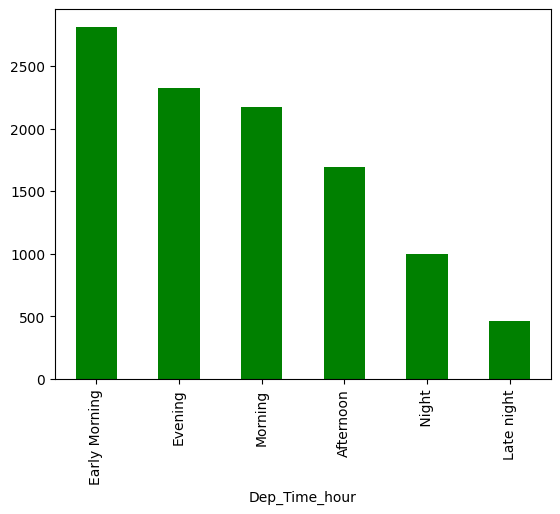

In [32]:
data['Dep_Time_hour'].apply(flight_take_off).value_counts().plot(kind = 'bar',color = 'green')

In [33]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ''+x
    elif 'm' not in x:
        x = x + '' + '0m'
    return x
    

In [34]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [35]:
# converting object dt to timedelta
data['Duration'] = pd.to_timedelta(data['Duration'])

# extracting the hours and minutes form duration
data['Duration_hours'] = data['Duration'].dt.components.hours
data['Duration_minutes'] = data['Duration'].dt.components.minutes

In [36]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2026-02-20 22:20:00,2026-03-22 01:10:00,0 days 02:50:00,non-stop,No info,3897,24,3,2019,22,20,1,20,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2026-02-20 05:50:00,2026-02-20 13:15:00,0 days 07:25:00,2 stops,No info,7662,1,5,2019,5,50,13,50,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2026-02-20 09:25:00,2026-06-10 04:25:00,0 days 19:00:00,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2026-02-20 18:05:00,2026-02-20 23:30:00,0 days 05:25:00,1 stop,No info,6218,12,5,2019,18,5,23,5,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2026-02-20 16:50:00,2026-02-20 21:35:00,0 days 04:45:00,1 stop,No info,13302,1,3,2019,16,50,21,50,4,45


In [37]:
# crop some unneccery features
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date_of_Journey_day',
       'Date_of_Journey_month', 'Date_of_Journey_year', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hours', 'Duration_minutes'],
      dtype='object')

In [38]:
cols_to_drop = ['Date_of_Journey','Route',
               'Dep_Time', 'Arrival_Time', 'Duration','Additional_Info']
data.drop(cols_to_drop, axis = 1, inplace = True)

In [39]:
data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,1,20,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,50,7,25


In [40]:
# encoding for categoricol features

# airline column
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [41]:
# applying target encoding for airline

airlines = data.groupby('Airline')['Price'].mean().sort_values().index
numbers = range(len(airlines))
zip(airlines,numbers)

dict_airlines = dict(zip(airlines, numbers))

data['Airline'] = data['Airline'].map(dict_airlines)


In [42]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,3,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,1,20,2,50
1,7,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,50,7,25
2,10,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,4,25,19,0
3,3,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,23,5,5,25
4,3,Banglore,New Delhi,1 stop,13302,1,3,2019,16,50,21,50,4,45


In [43]:
# encoding source
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [44]:
Source_dummies = pd.get_dummies(data['Source'],prefix = 'Source').astype(int)

data = pd.concat([data,Source_dummies], axis = 1)


In [45]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,1,20,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,50,7,25,0,0,0,1,0
2,10,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,23,5,5,25,0,0,0,1,0
4,3,Banglore,New Delhi,1 stop,13302,1,3,2019,16,50,21,50,4,45,1,0,0,0,0


In [46]:
# destination encoding
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [47]:
# taret encoding
destination = data.groupby('Destination')['Price'].mean().sort_values().index

numbers = range(len(destination))
zip(destination, numbers)

dict_destination = dict(zip(destination,numbers))
data['Destination'] = data['Destination'].map(dict_destination)


In [48]:
data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,Banglore,5,non-stop,3897,24,3,2019,22,20,1,20,2,50,1,0,0,0,0
1,7,Kolkata,3,2 stops,7662,1,5,2019,5,50,13,50,7,25,0,0,0,1,0


In [49]:
columns = {
       'non-stop': 0,
       '2 stops' : 2,
       '1 stops' : 1,
       '3 stops' : 3,
       '4 stops' : 4,
}
data['Total_Stops'] = data['Total_Stops'].map(columns)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Date_of_Journey_day,Date_of_Journey_month,Date_of_Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,Banglore,5,0.0,3897,24,3,2019,22,20,1,20,2,50,1,0,0,0,0
1,7,Kolkata,3,2.0,7662,1,5,2019,5,50,13,50,7,25,0,0,0,1,0
2,10,Delhi,4,2.0,13882,9,6,2019,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,NaN,6218,12,5,2019,18,5,23,5,5,25,0,0,0,1,0
4,3,Banglore,5,NaN,13302,1,3,2019,16,50,21,50,4,45,1,0,0,0,0


In [50]:
data['Date_of_Journey_year'].unique()
# dropping necessary cols


array([2019], dtype=int32)

In [51]:
col_to_drop = ['Date_of_Journey_year', 'Source'] 

data.drop(col_to_drop , axis = 1, inplace = True)
data.head()

,Airline,Destination,Total_Stops,Price,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,5,0.0,3897,24,3,22,20,1,20,2,50,1,0,0,0,0
1,7,3,2.0,7662,1,5,5,50,13,50,7,25,0,0,0,1,0
2,10,4,2.0,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,NaN,6218,12,5,18,5,23,5,5,25,0,0,0,1,0
4,3,5,NaN,13302,1,3,16,50,21,50,4,45,1,0,0,0,0


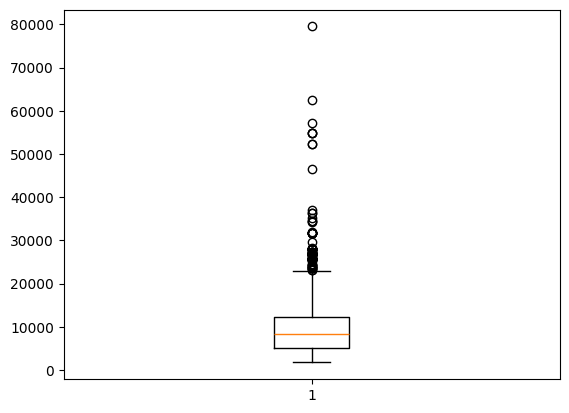

In [52]:
# handling with outliers in price

plt.boxplot(data['Price'])

plt.show()

In [53]:
# IQR method
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3 - q1

maximum =  q3+1.5*iqr

minimum = q1-1.5*iqr
len([Price for Price in data['Price']if Price > maximum or Price < minimum])

94

In [54]:
data.shape

(10462, 17)

In [55]:
print([Price for Price in data['Price']if Price > maximum or Price < minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [56]:
data['Price'] = np.where(data['Price']> 35000,data['Price'].median(), data['Price'])

In [57]:
print(([Price for Price in data['Price'] if Price > maximum or Price < minimum]))

[27430.0, 26890.0, 26890.0, 25139.0, 27210.0, 26743.0, 26890.0, 25735.0, 27992.0, 26890.0, 26890.0, 23583.0, 26890.0, 23533.0, 24115.0, 25735.0, 31783.0, 27992.0, 26890.0, 26890.0, 25430.0, 27210.0, 26890.0, 25735.0, 26890.0, 28097.0, 27992.0, 26890.0, 25735.0, 26092.0, 31825.0, 25913.0, 25735.0, 27992.0, 31825.0, 23267.0, 31825.0, 25430.0, 26890.0, 23843.0, 26890.0, 25735.0, 28322.0, 25735.0, 25735.0, 31825.0, 26890.0, 27992.0, 34273.0, 29528.0, 26890.0, 26890.0, 26890.0, 34503.0, 26890.0, 27992.0, 26890.0, 26890.0, 23170.0, 24528.0, 26890.0, 27992.0, 25735.0, 34608.0, 25703.0, 26890.0, 23528.0, 31825.0, 27282.0, 25735.0, 27992.0, 24017.0, 31945.0, 26890.0, 24318.0, 23677.0, 27992.0, 24210.0, 26890.0, 31825.0, 26480.0]


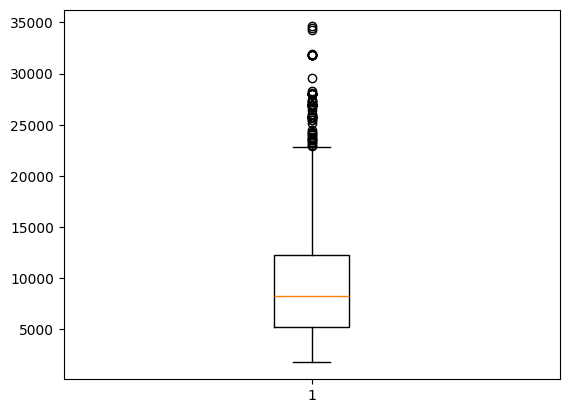

In [58]:
plt.boxplot(data['Price'])
plt.show()

In [59]:
data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'Date_of_Journey_day',
       'Date_of_Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_minutes', 'Source_Banglore', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai'],
      dtype='object')

In [60]:
data.head()

,Airline,Destination,Total_Stops,Price,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3,5,0.0,3897.0,24,3,22,20,1,20,2,50,1,0,0,0,0
1,7,3,2.0,7662.0,1,5,5,50,13,50,7,25,0,0,0,1,0
2,10,4,2.0,13882.0,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,3,NaN,6218.0,12,5,18,5,23,5,5,25,0,0,0,1,0
4,3,5,NaN,13302.0,1,3,16,50,21,50,4,45,1,0,0,0,0


# Random Forest

In [61]:
# model training
# random forest  regresser

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error


# defining feature and target
X = data.drop(['Price'], axis = 1)
y = data['Price']

# splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2 , random_state=42)

# model selectio
ml_model =RandomForestRegressor(random_state = 42)

# hyperparameters tuning
param_dist = {
    'n_estimators' : [100,200,300,400,500],
    'max_depth' : [10,20,30,40],
    'min_samples_split' :[2,3,5,7]}

search = RandomizedSearchCV(
    estimator = ml_model,
    n_iter = 30,
    param_distributions = param_dist,
    verbose = 2,
    cv = 7,
    n_jobs = -1,
    scoring = 'r2'
)
    
# training the model
search.fit(X_train,y_train)
best_model = search.best_estimator_
print(search.best_params_)

# making predictio
y_pred = best_model.predict(X_test)

# evalution
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(mse)
print(r2)

Fitting 7 folds for each of 30 candidates, totalling 210 fits
{'n_estimators': 500, 'min_samples_split': 7, 'max_depth': 20}
3400953.9830818074
0.8286107119609116


In [62]:
import pickle

with open('rd_random.pkl', 'wb') as file:
    pickle.dump(best_model, file)

model = open('rd_random.pkl', 'rb')

rf_model = pickle.load(model)

y_pred2 = rf_model.predict(X_test)

r22 = r2_score(y_test, y_pred2)
print(r22)

0.8286107119609116
